## MNIST dataset

In [1]:
# Imports

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import keras
import keras.layers
import keras.objectives
import keras.metrics
import keras.models

from tensorflow.examples.tutorials.mnist import input_data

Using TensorFlow backend.


In [2]:
# Load the MNIST data
mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz


Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
# How are the labels encoded? They are one-hot encoded
print (mnist_data.train.labels[:10])
train_classes = np.array([label.argmax() for label in mnist_data.train.labels])
print (train_classes[:10])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]
[7 3 4 6 1 8 1 0 9 8]


In [4]:
# Size of our dataset
print (len(mnist_data.train.labels))
print (len(mnist_data.test.labels))
print (len(mnist_data.validation.labels))

55000
10000
5000


In [5]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28
# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size
# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)
# Number of classes, one class for each of 10 digits.
num_classes = 10

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

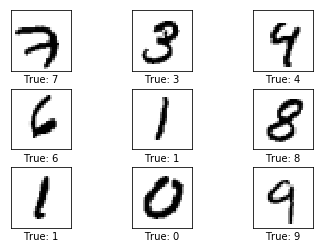

In [6]:
# Get the first images from the test-set.
images = mnist_data.train.images[:9]

# Get the true classes for those images.
cls_true = train_classes[:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

## Keras training model

In [7]:
# this placeholder will contain our input digits, as flat vectors
img = tf.placeholder(tf.float32, shape=(None, 784))

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_dim=784))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

preds = model(img)

In [9]:
# placeholder for the one hot label
labels = tf.placeholder(tf.float32, shape=(None, 10))

In [10]:
loss = tf.reduce_mean(keras.objectives.categorical_crossentropy(labels, preds))

In [11]:
# Uset the gradient descent optimizer
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [12]:
# Run tensorflow for training
#sess = tf.Session()
#sess = tf.Session(config=tf.ConfigProto(allow_growth=True))
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
keras.backend.set_session(sess)

# Initialize all variables
init_op = tf.global_variables_initializer()
sess.run(init_op)

# Run training loop
with sess.as_default():
    for i in range(1000):
        batch = mnist_data.train.next_batch(50)
        train_step.run(feed_dict={img: batch[0],
                                  labels: batch[1]})        

print('done')

done


In [13]:
# Save the current model to disk

model.save_weights('./concepts/tensorflow-tutorial/nmist.h5')

In [14]:
# Check the accuracy of the model
acc_value = keras.metrics.categorical_accuracy(labels, preds)
with sess.as_default():
    test_ans = acc_value.eval(feed_dict={img: mnist_data.test.images,
                                    labels: mnist_data.test.labels})
    
print ( sum(test_ans)/len(test_ans) * 100)

95.71


## Inference

In [15]:
# Get 9 images to get the inference for
inf_images = mnist_data.test.images[:9]

with sess.as_default():    
    inf_labels = sess.run(preds, feed_dict={img: inf_images})
    
print (inf_labels)

[[  1.05368042e-06   2.40723493e-05   4.86300087e-06   1.22711790e-04
    9.94723663e-08   1.43287684e-06   1.43235823e-07   9.99455035e-01
    7.10341965e-06   3.83429229e-04]
 [  1.16023286e-04   7.27049541e-03   9.82107341e-01   1.03162220e-02
    1.58224725e-06   2.60103734e-05   7.33362458e-06   1.44640362e-05
    1.40208373e-04   2.89424634e-07]
 [  5.69614567e-05   9.94093716e-01   8.33698083e-04   1.45548314e-04
    3.36104189e-04   1.95880118e-03   8.80737847e-04   1.07694615e-03
    5.81416476e-04   3.61016719e-05]
 [  9.99549329e-01   1.27673218e-06   7.62406562e-05   3.45407125e-06
    1.51568793e-05   4.29380589e-06   2.30310514e-04   1.33050216e-05
    1.54063455e-05   9.11630486e-05]
 [  4.17096133e-04   4.12051850e-05   9.75228148e-04   1.22537065e-04
    9.69605148e-01   1.42607678e-04   6.18059828e-04   9.05963185e-04
    6.54199510e-04   2.65179221e-02]
 [  5.15914599e-06   9.98717546e-01   5.60544468e-05   3.99543533e-05
    1.16352501e-04   1.40964679e-04   6.07711

[7 2 1 0 4 1 4 9 5]


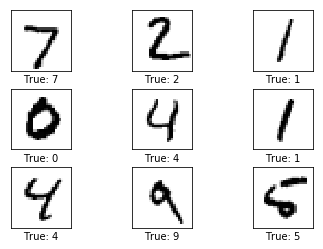

In [16]:
# Get the highest probability labels as the predicted digit 
pred_classes = np.array([label.argmax() for label in inf_labels])
print(pred_classes)

# Plot the images and labels using our helper-function above.
plot_images(images=inf_images, cls_true=pred_classes)

## Training using Keras commands than Tensorflow system

In [13]:
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [18]:
x_train = mnist_data.train.images
y_train = mnist_data.train.labels
x_test = mnist_data.test.images
y_test = mnist_data.test.labels

model.fit(x_train, y_train,
          batch_size=50,
          epochs=2,
          verbose=1, 
          validation_data=(x_test, y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/2


   50/55000 [..............................] - ETA: 11:27 - loss: 0.2794 - acc: 0.9200

  400/55000 [..............................] - ETA: 1:32 - loss: 0.1227 - acc: 0.9725 

  750/55000 [..............................] - ETA: 52s - loss: 0.1255 - acc: 0.9667 

 1100/55000 [..............................] - ETA: 38s - loss: 0.1151 - acc: 0.9691

 1450/55000 [..............................] - ETA: 31s - loss: 0.1127 - acc: 0.9690

 1800/55000 [..............................] - ETA: 26s - loss: 0.1038 - acc: 0.9728

 2150/55000 [>.............................] - ETA: 23s - loss: 0.1054 - acc: 0.9707

 2500/55000 [>.............................] - ETA: 21s - loss: 0.1050 - acc: 0.9716

 2850/55000 [>.............................] - ETA: 19s - loss: 0.1027 - acc: 0.9716

 3200/55000 [>.............................] - ETA: 17s - loss: 0.1017 - acc: 0.9719

 3550/55000 [>.............................] - ETA: 16s - loss: 0.1026 - acc: 0.9710



 3950/55000 [=>............................] - ETA: 15s - loss: 0.1021 - acc: 0.9709

 4300/55000 [=>............................] - ETA: 14s - loss: 0.1005 - acc: 0.9709

 4650/55000 [=>............................] - ETA: 14s - loss: 0.0999 - acc: 0.9710



 5000/55000 [=>............................] - ETA: 13s - loss: 0.1003 - acc: 0.9698

 5350/55000 [=>............................] - ETA: 13s - loss: 0.1001 - acc: 0.9699

 5750/55000 [==>...........................] - ETA: 12s - loss: 0.0995 - acc: 0.9704



 6100/55000 [==>...........................] - ETA: 12s - loss: 0.0969 - acc: 0.9711

 6450/55000 [==>...........................] - ETA: 11s - loss: 0.0965 - acc: 0.9715

 6800/55000 [==>...........................] - ETA: 11s - loss: 0.0953 - acc: 0.9718

 7200/55000 [==>...........................] - ETA: 11s - loss: 0.0934 - acc: 0.9721

 7600/55000 [===>..........................] - ETA: 10s - loss: 0.0940 - acc: 0.9721

 7950/55000 [===>..........................] - ETA: 10s - loss: 0.0951 - acc: 0.9719

 8250/55000 [===>..........................] - ETA: 10s - loss: 0.0959 - acc: 0.9720

 8600/55000 [===>..........................] - ETA: 10s - loss: 0.0948 - acc: 0.9723

 9000/55000 [===>..........................] - ETA: 9s - loss: 0.0966 - acc: 0.9719 

 9400/55000 [====>.........................] - ETA: 9s - loss: 0.0970 - acc: 0.9718

 9800/55000 [====>.........................] - ETA: 9s - loss: 0.0960 - acc: 0.9722

10150/55000 [====>.........................] - ETA: 9s - loss: 0.0941 - acc: 0.9728

10550/55000 [====>.........................] - ETA: 9s - loss: 0.0955 - acc: 0.9723

10900/55000 [====>.........................] - ETA: 8s - loss: 0.0945 - acc: 0.9728

11250/55000 [=====>........................] - ETA: 8s - loss: 0.0956 - acc: 0.9724

11650/55000 [=====>........................] - ETA: 8s - loss: 0.0959 - acc: 0.9724

12000/55000 [=====>........................] - ETA: 8s - loss: 0.0963 - acc: 0.9725

12350/55000 [=====>........................] - ETA: 8s - loss: 0.0955 - acc: 0.9728

12700/55000 [=====>........................] - ETA: 8s - loss: 0.0956 - acc: 0.9728

13050/55000 [======>.......................] - ETA: 8s - loss: 0.0941 - acc: 0.9733

13350/55000 [======>.......................] - ETA: 8s - loss: 0.0948 - acc: 0.9728

13700/55000 [======>.......................] - ETA: 7s - loss: 0.0943 - acc: 0.9731

14000/55000 [======>.......................] - ETA: 7s - loss: 0.0943 - acc: 0.9730

14300/55000 [======>.......................] - ETA: 7s - loss: 0.0933 - acc: 0.9732

14600/55000 [======>.......................] - ETA: 7s - loss: 0.0935 - acc: 0.9734

14950/55000 [=======>......................] - ETA: 7s - loss: 0.0949 - acc: 0.9730

15250/55000 [=======>......................] - ETA: 7s - loss: 0.0947 - acc: 0.9730

15600/55000 [=======>......................] - ETA: 7s - loss: 0.0948 - acc: 0.9732

15900/55000 [=======>......................] - ETA: 7s - loss: 0.0947 - acc: 0.9734



16250/55000 [=======>......................] - ETA: 7s - loss: 0.0950 - acc: 0.9734

16600/55000 [========>.....................] - ETA: 7s - loss: 0.0954 - acc: 0.9731

16950/55000 [========>.....................] - ETA: 7s - loss: 0.0957 - acc: 0.9730

17300/55000 [========>.....................] - ETA: 7s - loss: 0.0960 - acc: 0.9728

17650/55000 [========>.....................] - ETA: 6s - loss: 0.0957 - acc: 0.9729

18050/55000 [========>.....................] - ETA: 6s - loss: 0.0964 - acc: 0.9726

18450/55000 [=========>....................] - ETA: 6s - loss: 0.0964 - acc: 0.9726

18800/55000 [=========>....................] - ETA: 6s - loss: 0.0962 - acc: 0.9727

19150/55000 [=========>....................] - ETA: 6s - loss: 0.0969 - acc: 0.9726

19500/55000 [=========>....................] - ETA: 6s - loss: 0.0973 - acc: 0.9726

19850/55000 [=========>....................] - ETA: 6s - loss: 0.0969 - acc: 0.9726

20150/55000 [=========>....................] - ETA: 6s - loss: 0.0970 - acc: 0.9727

20400/55000 [==========>...................] - ETA: 6s - loss: 0.0967 - acc: 0.9727

20600/55000 [==========>...................] - ETA: 6s - loss: 0.0964 - acc: 0.9729

20800/55000 [==========>...................] - ETA: 6s - loss: 0.0959 - acc: 0.9730

21000/55000 [==========>...................] - ETA: 6s - loss: 0.0957 - acc: 0.9731

21250/55000 [==========>...................] - ETA: 6s - loss: 0.0955 - acc: 0.9731

21550/55000 [==========>...................] - ETA: 6s - loss: 0.0959 - acc: 0.9728

21800/55000 [==========>...................] - ETA: 6s - loss: 0.0957 - acc: 0.9728

22000/55000 [===========>..................] - ETA: 6s - loss: 0.0955 - acc: 0.9729

22200/55000 [===========>..................] - ETA: 6s - loss: 0.0957 - acc: 0.9728

22400/55000 [===========>..................] - ETA: 6s - loss: 0.0954 - acc: 0.9729

22650/55000 [===========>..................] - ETA: 6s - loss: 0.0955 - acc: 0.9728

22850/55000 [===========>..................] - ETA: 6s - loss: 0.0955 - acc: 0.9727

23100/55000 [===========>..................] - ETA: 6s - loss: 0.0949 - acc: 0.9729

23300/55000 [===========>..................] - ETA: 6s - loss: 0.0949 - acc: 0.9729

23500/55000 [===========>..................] - ETA: 6s - loss: 0.0952 - acc: 0.9729

23650/55000 [===========>..................] - ETA: 6s - loss: 0.0952 - acc: 0.9728

23800/55000 [===========>..................] - ETA: 6s - loss: 0.0952 - acc: 0.9727

23950/55000 [============>.................] - ETA: 6s - loss: 0.0951 - acc: 0.9727

24250/55000 [============>.................] - ETA: 5s - loss: 0.0948 - acc: 0.9727

24600/55000 [============>.................] - ETA: 5s - loss: 0.0947 - acc: 0.9728

24900/55000 [============>.................] - ETA: 5s - loss: 0.0947 - acc: 0.9729

25200/55000 [============>.................] - ETA: 5s - loss: 0.0948 - acc: 0.9728

25500/55000 [============>.................] - ETA: 5s - loss: 0.0948 - acc: 0.9727

25850/55000 [=============>................] - ETA: 5s - loss: 0.0946 - acc: 0.9727

26150/55000 [=============>................] - ETA: 5s - loss: 0.0953 - acc: 0.9724

26500/55000 [=============>................] - ETA: 5s - loss: 0.0955 - acc: 0.9723

26850/55000 [=============>................] - ETA: 5s - loss: 0.0948 - acc: 0.9725

27200/55000 [=============>................] - ETA: 5s - loss: 0.0946 - acc: 0.9726

27550/55000 [==============>...............] - ETA: 5s - loss: 0.0950 - acc: 0.9724

27900/55000 [==============>...............] - ETA: 5s - loss: 0.0947 - acc: 0.9725

28300/55000 [==============>...............] - ETA: 5s - loss: 0.0944 - acc: 0.9725

28700/55000 [==============>...............] - ETA: 4s - loss: 0.0936 - acc: 0.9727

29050/55000 [==============>...............] - ETA: 4s - loss: 0.0935 - acc: 0.9727

29400/55000 [===============>..............] - ETA: 4s - loss: 0.0937 - acc: 0.9726

29750/55000 [===============>..............] - ETA: 4s - loss: 0.0935 - acc: 0.9727

30150/55000 [===============>..............] - ETA: 4s - loss: 0.0941 - acc: 0.9725

30500/55000 [===============>..............] - ETA: 4s - loss: 0.0938 - acc: 0.9726

30850/55000 [===============>..............] - ETA: 4s - loss: 0.0934 - acc: 0.9726

31200/55000 [================>.............] - ETA: 4s - loss: 0.0935 - acc: 0.9726

31550/55000 [================>.............] - ETA: 4s - loss: 0.0931 - acc: 0.9727

31900/55000 [================>.............] - ETA: 4s - loss: 0.0936 - acc: 0.9725

32250/55000 [================>.............] - ETA: 4s - loss: 0.0933 - acc: 0.9725

32600/55000 [================>.............] - ETA: 4s - loss: 0.0933 - acc: 0.9725

32950/55000 [================>.............] - ETA: 4s - loss: 0.0930 - acc: 0.9725

33300/55000 [=================>............] - ETA: 3s - loss: 0.0931 - acc: 0.9723

33650/55000 [=================>............] - ETA: 3s - loss: 0.0930 - acc: 0.9723

34000/55000 [=================>............] - ETA: 3s - loss: 0.0939 - acc: 0.9720

34350/55000 [=================>............] - ETA: 3s - loss: 0.0938 - acc: 0.9720

34700/55000 [=================>............] - ETA: 3s - loss: 0.0938 - acc: 0.9719

35050/55000 [==================>...........] - ETA: 3s - loss: 0.0937 - acc: 0.9720

35350/55000 [==================>...........] - ETA: 3s - loss: 0.0936 - acc: 0.9719

35650/55000 [==================>...........] - ETA: 3s - loss: 0.0936 - acc: 0.9719

35950/55000 [==================>...........] - ETA: 3s - loss: 0.0936 - acc: 0.9718

36250/55000 [==================>...........] - ETA: 3s - loss: 0.0933 - acc: 0.9720

36550/55000 [==================>...........] - ETA: 3s - loss: 0.0930 - acc: 0.9721

36900/55000 [===================>..........] - ETA: 3s - loss: 0.0931 - acc: 0.9721



37200/55000 [===================>..........] - ETA: 3s - loss: 0.0925 - acc: 0.9723

37550/55000 [===================>..........] - ETA: 3s - loss: 0.0926 - acc: 0.9724

37900/55000 [===================>..........] - ETA: 3s - loss: 0.0923 - acc: 0.9725

38250/55000 [===================>..........] - ETA: 3s - loss: 0.0921 - acc: 0.9726

38600/55000 [====================>.........] - ETA: 2s - loss: 0.0919 - acc: 0.9726

39000/55000 [====================>.........] - ETA: 2s - loss: 0.0919 - acc: 0.9726

39350/55000 [====================>.........] - ETA: 2s - loss: 0.0916 - acc: 0.9728

39700/55000 [====================>.........] - ETA: 2s - loss: 0.0913 - acc: 0.9728

40100/55000 [====================>.........] - ETA: 2s - loss: 0.0915 - acc: 0.9728

40450/55000 [=====================>........] - ETA: 2s - loss: 0.0912 - acc: 0.9730

40850/55000 [=====================>........] - ETA: 2s - loss: 0.0913 - acc: 0.9729

41200/55000 [=====================>........] - ETA: 2s - loss: 0.0911 - acc: 0.9730

41550/55000 [=====================>........] - ETA: 2s - loss: 0.0911 - acc: 0.9730

41900/55000 [=====================>........] - ETA: 2s - loss: 0.0908 - acc: 0.9731

42250/55000 [======================>.......] - ETA: 2s - loss: 0.0907 - acc: 0.9731

42600/55000 [======================>.......] - ETA: 2s - loss: 0.0912 - acc: 0.9731

42950/55000 [======================>.......] - ETA: 2s - loss: 0.0912 - acc: 0.9730

43300/55000 [======================>.......] - ETA: 2s - loss: 0.0911 - acc: 0.9730

43650/55000 [======================>.......] - ETA: 2s - loss: 0.0910 - acc: 0.9731

44000/55000 [=======================>......] - ETA: 1s - loss: 0.0907 - acc: 0.9731

44350/55000 [=======================>......] - ETA: 1s - loss: 0.0905 - acc: 0.9732



44700/55000 [=======================>......] - ETA: 1s - loss: 0.0901 - acc: 0.9733

45050/55000 [=======================>......] - ETA: 1s - loss: 0.0902 - acc: 0.9732

45400/55000 [=======================>......] - ETA: 1s - loss: 0.0903 - acc: 0.9732

45800/55000 [=======================>......] - ETA: 1s - loss: 0.0900 - acc: 0.9733

46200/55000 [========================>.....] - ETA: 1s - loss: 0.0895 - acc: 0.9734

46550/55000 [========================>.....] - ETA: 1s - loss: 0.0894 - acc: 0.9734

46900/55000 [========================>.....] - ETA: 1s - loss: 0.0893 - acc: 0.9734

47300/55000 [========================>.....] - ETA: 1s - loss: 0.0890 - acc: 0.9735

47650/55000 [========================>.....] - ETA: 1s - loss: 0.0889 - acc: 0.9734

48000/55000 [=========================>....] - ETA: 1s - loss: 0.0889 - acc: 0.9734

48350/55000 [=========================>....] - ETA: 1s - loss: 0.0885 - acc: 0.9736

48700/55000 [=========================>....] - ETA: 1s - loss: 0.0883 - acc: 0.9736

49050/55000 [=========================>....] - ETA: 1s - loss: 0.0882 - acc: 0.9736

49400/55000 [=========================>....] - ETA: 0s - loss: 0.0879 - acc: 0.9737



49750/55000 [==========================>...] - ETA: 0s - loss: 0.0879 - acc: 0.9736

50100/55000 [==========================>...] - ETA: 0s - loss: 0.0879 - acc: 0.9736

50500/55000 [==========================>...] - ETA: 0s - loss: 0.0880 - acc: 0.9736

50850/55000 [==========================>...] - ETA: 0s - loss: 0.0877 - acc: 0.9737

51200/55000 [==========================>...] - ETA: 0s - loss: 0.0875 - acc: 0.9738

51550/55000 [===========================>..] - ETA: 0s - loss: 0.0874 - acc: 0.9738

51900/55000 [===========================>..] - ETA: 0s - loss: 0.0872 - acc: 0.9739

52250/55000 [===========================>..] - ETA: 0s - loss: 0.0869 - acc: 0.9739

52600/55000 [===========================>..] - ETA: 0s - loss: 0.0870 - acc: 0.9738

52900/55000 [===========================>..] - ETA: 0s - loss: 0.0869 - acc: 0.9739

53200/55000 [============================>.] - ETA: 0s - loss: 0.0866 - acc: 0.9740

53550/55000 [============================>.] - ETA: 0s - loss: 0.0865 - acc: 0.9739



53900/55000 [============================>.] - ETA: 0s - loss: 0.0866 - acc: 0.9739

54300/55000 [============================>.] - ETA: 0s - loss: 0.0868 - acc: 0.9738

54650/55000 [============================>.] - ETA: 0s - loss: 0.0865 - acc: 0.9739

55000/55000 [==============================] - 10s 189us/step - loss: 0.0863 - acc: 0.9739 - val_loss: 0.0872 - val_acc: 0.9730


Epoch 2/2
   50/55000 [..............................] - ETA: 13s - loss: 0.0139 - acc: 1.0000

  350/55000 [..............................] - ETA: 9s - loss: 0.0580 - acc: 0.9771 

  650/55000 [..............................] - ETA: 9s - loss: 0.0485 - acc: 0.9831

  950/55000 [..............................] - ETA: 9s - loss: 0.0524 - acc: 0.9821

 1300/55000 [..............................] - ETA: 9s - loss: 0.0568 - acc: 0.9823

 1650/55000 [..............................] - ETA: 8s - loss: 0.0608 - acc: 0.9794

 2000/55000 [>.............................] - ETA: 8s - loss: 0.0613 - acc: 0.9785

 2350/55000 [>.............................] - ETA: 8s - loss: 0.0714 - acc: 0.9749

 2700/55000 [>.............................] - ETA: 8s - loss: 0.0687 - acc: 0.9752

 3050/55000 [>.............................] - ETA: 8s - loss: 0.0698 - acc: 0.9751

 3400/55000 [>.............................] - ETA: 8s - loss: 0.0730 - acc: 0.9759

 3700/55000 [=>............................] - ETA: 8s - loss: 0.0761 - acc: 0.9746

 4000/55000 [=>............................] - ETA: 8s - loss: 0.0756 - acc: 0.9753

 4350/55000 [=>............................] - ETA: 8s - loss: 0.0725 - acc: 0.9763

 4700/55000 [=>............................] - ETA: 8s - loss: 0.0708 - acc: 0.9768

 5050/55000 [=>............................] - ETA: 7s - loss: 0.0714 - acc: 0.9768



 5400/55000 [=>............................] - ETA: 7s - loss: 0.0694 - acc: 0.9780

 5750/55000 [==>...........................] - ETA: 7s - loss: 0.0696 - acc: 0.9783



 6100/55000 [==>...........................] - ETA: 7s - loss: 0.0695 - acc: 0.9782

 6500/55000 [==>...........................] - ETA: 7s - loss: 0.0696 - acc: 0.9775

 6850/55000 [==>...........................] - ETA: 7s - loss: 0.0705 - acc: 0.9774

 7200/55000 [==>...........................] - ETA: 7s - loss: 0.0689 - acc: 0.9778

 7600/55000 [===>..........................] - ETA: 7s - loss: 0.0689 - acc: 0.9780

 7950/55000 [===>..........................] - ETA: 7s - loss: 0.0707 - acc: 0.9779

 8300/55000 [===>..........................] - ETA: 7s - loss: 0.0692 - acc: 0.9784

 8650/55000 [===>..........................] - ETA: 7s - loss: 0.0692 - acc: 0.9785

 9000/55000 [===>..........................] - ETA: 7s - loss: 0.0692 - acc: 0.9780

 9350/55000 [====>.........................] - ETA: 6s - loss: 0.0694 - acc: 0.9782



 9700/55000 [====>.........................] - ETA: 6s - loss: 0.0680 - acc: 0.9787

10050/55000 [====>.........................] - ETA: 6s - loss: 0.0687 - acc: 0.9788

10400/55000 [====>.........................] - ETA: 6s - loss: 0.0688 - acc: 0.9788

10800/55000 [====>.........................] - ETA: 6s - loss: 0.0682 - acc: 0.9791

11150/55000 [=====>........................] - ETA: 6s - loss: 0.0697 - acc: 0.9787

11500/55000 [=====>........................] - ETA: 6s - loss: 0.0694 - acc: 0.9789

11850/55000 [=====>........................] - ETA: 6s - loss: 0.0703 - acc: 0.9787



12200/55000 [=====>........................] - ETA: 6s - loss: 0.0697 - acc: 0.9789

12550/55000 [=====>........................] - ETA: 6s - loss: 0.0695 - acc: 0.9789

12950/55000 [======>.......................] - ETA: 6s - loss: 0.0691 - acc: 0.9788

13350/55000 [======>.......................] - ETA: 6s - loss: 0.0688 - acc: 0.9790

13700/55000 [======>.......................] - ETA: 6s - loss: 0.0687 - acc: 0.9790

14050/55000 [======>.......................] - ETA: 6s - loss: 0.0692 - acc: 0.9789

14450/55000 [======>.......................] - ETA: 6s - loss: 0.0684 - acc: 0.9792



14800/55000 [=======>......................] - ETA: 6s - loss: 0.0688 - acc: 0.9791

15150/55000 [=======>......................] - ETA: 5s - loss: 0.0696 - acc: 0.9790

15500/55000 [=======>......................] - ETA: 5s - loss: 0.0699 - acc: 0.9788

15850/55000 [=======>......................] - ETA: 5s - loss: 0.0707 - acc: 0.9784

16200/55000 [=======>......................] - ETA: 5s - loss: 0.0706 - acc: 0.9786

16550/55000 [========>.....................] - ETA: 5s - loss: 0.0709 - acc: 0.9785



16900/55000 [========>.....................] - ETA: 5s - loss: 0.0709 - acc: 0.9785

17250/55000 [========>.....................] - ETA: 5s - loss: 0.0708 - acc: 0.9786

17600/55000 [========>.....................] - ETA: 5s - loss: 0.0708 - acc: 0.9786



18000/55000 [========>.....................] - ETA: 5s - loss: 0.0701 - acc: 0.9789

18350/55000 [=========>....................] - ETA: 5s - loss: 0.0700 - acc: 0.9790

18700/55000 [=========>....................] - ETA: 5s - loss: 0.0697 - acc: 0.9790

19050/55000 [=========>....................] - ETA: 5s - loss: 0.0692 - acc: 0.9790

19450/55000 [=========>....................] - ETA: 5s - loss: 0.0702 - acc: 0.9788

19850/55000 [=========>....................] - ETA: 5s - loss: 0.0708 - acc: 0.9786

20250/55000 [==========>...................] - ETA: 5s - loss: 0.0712 - acc: 0.9784

20650/55000 [==========>...................] - ETA: 5s - loss: 0.0712 - acc: 0.9783

21050/55000 [==========>...................] - ETA: 5s - loss: 0.0715 - acc: 0.9781

21450/55000 [==========>...................] - ETA: 4s - loss: 0.0710 - acc: 0.9782

21800/55000 [==========>...................] - ETA: 4s - loss: 0.0704 - acc: 0.9784

22150/55000 [===========>..................] - ETA: 4s - loss: 0.0699 - acc: 0.9785

22500/55000 [===========>..................] - ETA: 4s - loss: 0.0698 - acc: 0.9785

22850/55000 [===========>..................] - ETA: 4s - loss: 0.0698 - acc: 0.9786

23200/55000 [===========>..................] - ETA: 4s - loss: 0.0698 - acc: 0.9785

23550/55000 [===========>..................] - ETA: 4s - loss: 0.0701 - acc: 0.9784

23900/55000 [============>.................] - ETA: 4s - loss: 0.0700 - acc: 0.9785

24250/55000 [============>.................] - ETA: 4s - loss: 0.0697 - acc: 0.9785

24600/55000 [============>.................] - ETA: 4s - loss: 0.0694 - acc: 0.9786



24950/55000 [============>.................] - ETA: 4s - loss: 0.0692 - acc: 0.9788

25300/55000 [============>.................] - ETA: 4s - loss: 0.0689 - acc: 0.9789

25700/55000 [=============>................] - ETA: 4s - loss: 0.0689 - acc: 0.9789

26050/55000 [=============>................] - ETA: 4s - loss: 0.0687 - acc: 0.9790

26450/55000 [=============>................] - ETA: 4s - loss: 0.0689 - acc: 0.9788

26850/55000 [=============>................] - ETA: 4s - loss: 0.0687 - acc: 0.9788

27250/55000 [=============>................] - ETA: 4s - loss: 0.0691 - acc: 0.9787

27650/55000 [==============>...............] - ETA: 4s - loss: 0.0685 - acc: 0.9789

28000/55000 [==============>...............] - ETA: 3s - loss: 0.0684 - acc: 0.9789

28350/55000 [==============>...............] - ETA: 3s - loss: 0.0683 - acc: 0.9790

28700/55000 [==============>...............] - ETA: 3s - loss: 0.0679 - acc: 0.9791

29050/55000 [==============>...............] - ETA: 3s - loss: 0.0676 - acc: 0.9792



29400/55000 [===============>..............] - ETA: 3s - loss: 0.0676 - acc: 0.9793

29750/55000 [===============>..............] - ETA: 3s - loss: 0.0678 - acc: 0.9791

30100/55000 [===============>..............] - ETA: 3s - loss: 0.0678 - acc: 0.9791

30500/55000 [===============>..............] - ETA: 3s - loss: 0.0679 - acc: 0.9790

30900/55000 [===============>..............] - ETA: 3s - loss: 0.0676 - acc: 0.9791

31300/55000 [================>.............] - ETA: 3s - loss: 0.0673 - acc: 0.9792

31650/55000 [================>.............] - ETA: 3s - loss: 0.0670 - acc: 0.9792

32000/55000 [================>.............] - ETA: 3s - loss: 0.0670 - acc: 0.9793

32400/55000 [================>.............] - ETA: 3s - loss: 0.0669 - acc: 0.9793

32800/55000 [================>.............] - ETA: 3s - loss: 0.0673 - acc: 0.9793

33150/55000 [=================>............] - ETA: 3s - loss: 0.0673 - acc: 0.9793

33550/55000 [=================>............] - ETA: 3s - loss: 0.0669 - acc: 0.9794



33900/55000 [=================>............] - ETA: 3s - loss: 0.0666 - acc: 0.9795



34250/55000 [=================>............] - ETA: 3s - loss: 0.0664 - acc: 0.9796

34600/55000 [=================>............] - ETA: 2s - loss: 0.0661 - acc: 0.9798

34950/55000 [==================>...........] - ETA: 2s - loss: 0.0661 - acc: 0.9798



35350/55000 [==================>...........] - ETA: 2s - loss: 0.0663 - acc: 0.9797

35700/55000 [==================>...........] - ETA: 2s - loss: 0.0666 - acc: 0.9797

36050/55000 [==================>...........] - ETA: 2s - loss: 0.0665 - acc: 0.9798

36400/55000 [==================>...........] - ETA: 2s - loss: 0.0662 - acc: 0.9799

36750/55000 [===================>..........] - ETA: 2s - loss: 0.0662 - acc: 0.9799

37100/55000 [===================>..........] - ETA: 2s - loss: 0.0659 - acc: 0.9801

37450/55000 [===================>..........] - ETA: 2s - loss: 0.0659 - acc: 0.9801

37800/55000 [===================>..........] - ETA: 2s - loss: 0.0657 - acc: 0.9801

38150/55000 [===================>..........] - ETA: 2s - loss: 0.0659 - acc: 0.9801

38500/55000 [====================>.........] - ETA: 2s - loss: 0.0657 - acc: 0.9801

38850/55000 [====================>.........] - ETA: 2s - loss: 0.0657 - acc: 0.9801



39250/55000 [====================>.........] - ETA: 2s - loss: 0.0662 - acc: 0.9800

39600/55000 [====================>.........] - ETA: 2s - loss: 0.0659 - acc: 0.9800

39950/55000 [====================>.........] - ETA: 2s - loss: 0.0658 - acc: 0.9801



40300/55000 [====================>.........] - ETA: 2s - loss: 0.0657 - acc: 0.9801

40650/55000 [=====================>........] - ETA: 2s - loss: 0.0658 - acc: 0.9800

41050/55000 [=====================>........] - ETA: 2s - loss: 0.0660 - acc: 0.9798

41400/55000 [=====================>........] - ETA: 1s - loss: 0.0658 - acc: 0.9799

41800/55000 [=====================>........] - ETA: 1s - loss: 0.0656 - acc: 0.9800

42150/55000 [=====================>........] - ETA: 1s - loss: 0.0655 - acc: 0.9800



42500/55000 [======================>.......] - ETA: 1s - loss: 0.0655 - acc: 0.9800



42850/55000 [======================>.......] - ETA: 1s - loss: 0.0658 - acc: 0.9800

43200/55000 [======================>.......] - ETA: 1s - loss: 0.0656 - acc: 0.9801

43550/55000 [======================>.......] - ETA: 1s - loss: 0.0658 - acc: 0.9801

43900/55000 [======================>.......] - ETA: 1s - loss: 0.0656 - acc: 0.9801

44250/55000 [=======================>......] - ETA: 1s - loss: 0.0656 - acc: 0.9802

44600/55000 [=======================>......] - ETA: 1s - loss: 0.0657 - acc: 0.9802



45000/55000 [=======================>......] - ETA: 1s - loss: 0.0656 - acc: 0.9802

45350/55000 [=======================>......] - ETA: 1s - loss: 0.0655 - acc: 0.9802

45700/55000 [=======================>......] - ETA: 1s - loss: 0.0654 - acc: 0.9802

46050/55000 [========================>.....] - ETA: 1s - loss: 0.0652 - acc: 0.9803

46450/55000 [========================>.....] - ETA: 1s - loss: 0.0651 - acc: 0.9803

46800/55000 [========================>.....] - ETA: 1s - loss: 0.0651 - acc: 0.9804

47150/55000 [========================>.....] - ETA: 1s - loss: 0.0650 - acc: 0.9804



47500/55000 [========================>.....] - ETA: 1s - loss: 0.0650 - acc: 0.9804

47900/55000 [=========================>....] - ETA: 1s - loss: 0.0650 - acc: 0.9804

48250/55000 [=========================>....] - ETA: 0s - loss: 0.0652 - acc: 0.9804

48650/55000 [=========================>....] - ETA: 0s - loss: 0.0650 - acc: 0.9804

49000/55000 [=========================>....] - ETA: 0s - loss: 0.0651 - acc: 0.9804



49350/55000 [=========================>....] - ETA: 0s - loss: 0.0653 - acc: 0.9803

49700/55000 [==========================>...] - ETA: 0s - loss: 0.0652 - acc: 0.9804

50100/55000 [==========================>...] - ETA: 0s - loss: 0.0653 - acc: 0.9803



50450/55000 [==========================>...] - ETA: 0s - loss: 0.0651 - acc: 0.9804

50800/55000 [==========================>...] - ETA: 0s - loss: 0.0652 - acc: 0.9803

51200/55000 [==========================>...] - ETA: 0s - loss: 0.0651 - acc: 0.9804

51600/55000 [===========================>..] - ETA: 0s - loss: 0.0650 - acc: 0.9804

51950/55000 [===========================>..] - ETA: 0s - loss: 0.0649 - acc: 0.9804

52300/55000 [===========================>..] - ETA: 0s - loss: 0.0651 - acc: 0.9804

52650/55000 [===========================>..] - ETA: 0s - loss: 0.0652 - acc: 0.9803



53000/55000 [===========================>..] - ETA: 0s - loss: 0.0651 - acc: 0.9804

53350/55000 [============================>.] - ETA: 0s - loss: 0.0652 - acc: 0.9804

53750/55000 [============================>.] - ETA: 0s - loss: 0.0651 - acc: 0.9804

54100/55000 [============================>.] - ETA: 0s - loss: 0.0651 - acc: 0.9804

54450/55000 [============================>.] - ETA: 0s - loss: 0.0648 - acc: 0.9805

54800/55000 [============================>.] - ETA: 0s - loss: 0.0649 - acc: 0.9804

55000/55000 [==============================] - 9s 159us/step - loss: 0.0650 - acc: 0.9804 - val_loss: 0.0747 - val_acc: 0.9778


In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0746797252513
Test accuracy: 0.9778


In [20]:
# Save the current model to disk

model.save_weights('./concepts/tensorflow-tutorial/nmist2.h5')